In [120]:
library(tidyverse)
library(MASS)
library(ISLR)
library(corrplot)
library(scatterplot3d)
library(plotly)
library(rgl)
library(knitr)
library(dplyr)
library(ggplot2)
library(broom)
library(ggfortify)
options( warn = -1 )

* [Logistic Regression](#Logistic-Regression)
* [Default Example](#Default-Example)

# Logistic Regression

The linear regression in a binary response using multiple predictors:
$$\log\left(\frac{p(X)}{1 - p(X)}\right)= \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p,$$
where $X= (X_1 ,...,X_p )$ are $p$ predictors. Here, the quantity $p(X)/[1−p(X)]$ is called **the odds**, and can take on any value odds between 0 and $\inf$.

The linear regression can be solved for $p(X)$,
$$p(X) =\dfrac{e^{\beta_0 +\beta_1 X_1 +\dots+\beta_p X_p}}{1 + e^{\beta_0 +\beta_1 X_1 +\dots+\beta_p X_p}}.$$

We can use the maximum likelihood method to estimate $\beta_j$ for $j=1,\ldots,p$. 

## Default Example

In [121]:
Default = read.csv(file="Data/Default.csv",head=TRUE,sep=",", fileEncoding="UTF-8-BOM");
head(Default)

Default,Student,Balance,Income
No,No,729.5265,44361.625
No,Yes,817.1804,12106.135
No,No,1073.5492,31767.139
No,No,529.2506,35704.494
No,No,785.6559,38463.496
No,Yes,919.5885,7491.559


Dividing the income by 1000.

In [122]:
Default['Income']=Default['Income']/1000
head(Default)

Default,Student,Balance,Income
No,No,729.5265,44.361625
No,Yes,817.1804,12.106135
No,No,1073.5492,31.767139
No,No,529.2506,35.704494
No,No,785.6559,38.463496
No,Yes,919.5885,7.491559


The probability of default:

$$p(X) =\dfrac{e^{\beta_0 +\beta_1 \times  \text{Student} +\beta_2 \times  \text{Balance} +\beta_3 \times  \text{Income} }}
{1+e^{\beta_0 +\beta_1 \times  \text{Student} +\beta_2 \times  \text{Balance} +\beta_3 \times  \text{Income} }}.$$ 

Here, Student status is encoded as a dummy variable as

$$\text{Student}=\begin{cases}
  1, & \mbox{Student},\\
  0, & \mbox{Non-Student}. \\
\end{cases}$$
This means

In [123]:
contrasts(Default$Default)
contrasts(Default$Student)

,Yes
No,0
Yes,1


,Yes
No,0
Yes,1


In [124]:
df=Default
df$Default=as.numeric(Default$Default == "Yes")
df$Student=as.numeric(Default$Student == "Yes")
head(Default)
head(df)

Default,Student,Balance,Income
No,No,729.5265,44.361625
No,Yes,817.1804,12.106135
No,No,1073.5492,31.767139
No,No,529.2506,35.704494
No,No,785.6559,38.463496
No,Yes,919.5885,7.491559


Default,Student,Balance,Income
0,0,729.5265,44.361625
0,1,817.1804,12.106135
0,0,1073.5492,31.767139
0,0,529.2506,35.704494
0,0,785.6559,38.463496
0,1,919.5885,7.491559


In [125]:
Model=glm(Default ~ Student + Income + Balance, family = binomial ,data=df)
summary(Model)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-10.869045196,0.4922555156,-22.080088,4.911280e-108
Student,-0.646775807,0.2362525287,-2.737646,6.188063e-03
Income,0.003033450,0.0082026153,0.369815,7.115203e-01
Balance,0.005736505,0.0002318945,24.737563,4.219578e-135


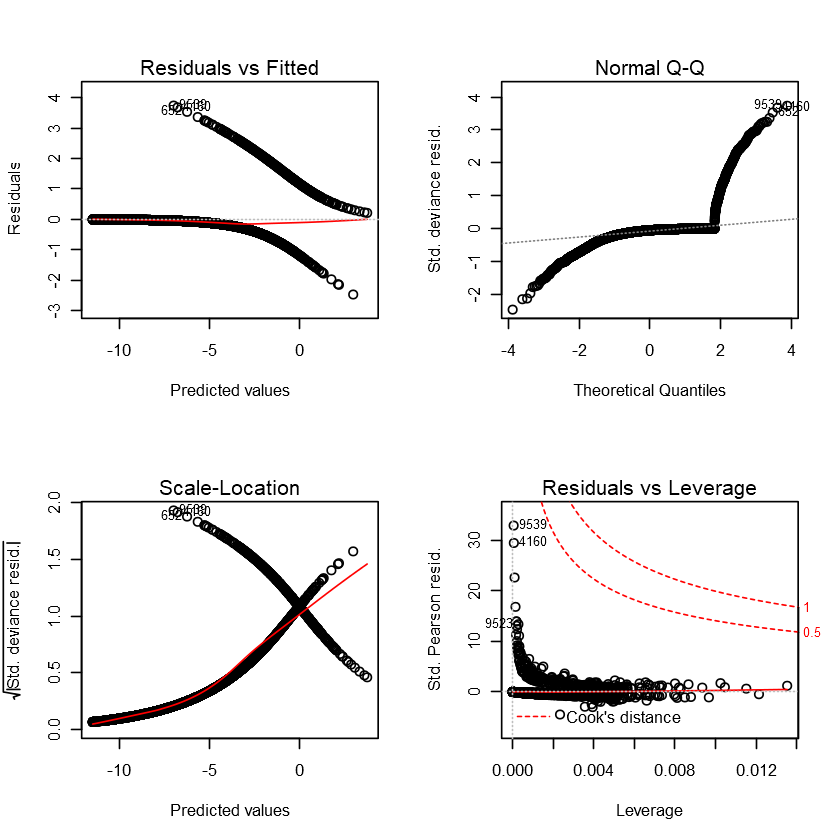

In [126]:
par(mfrow=c(2,2))
plot(Model)

For example, consider a student, James, with a credit card balance of $\$1,200$ and an income of $\$40,000$, and a non-student, Robert with the same balance and income. The estimated probability of defaults for these two:

In [127]:
df0 <- data.frame("Name" = c("James","Robert"),"Student" = c(1,0), "Income"=c(40,40),"Balance"= c(1500,1500))
df0

Name,Student,Income,Balance
James,1,40,1500
Robert,0,40,1500


In [128]:
E=exp(Model$coef['(Intercept)']+Model$coef['Student']*df0$Student+Model$coef['Income']*df0$Income
      +Model$coef['Balance']*df0$Balance)
Prob_of_defaults <- data.frame("Name" = c("James","Robert"),"Probability of defaults" = E/(1+E))
Prob_of_defaults

Name,Probability.of.defaults
James,0.05788194
Robert,0.10499192


This shows that a student tends to have higher default probabilities than a non-student.

Now, consider

In [129]:
df3=Default %>% group_by(Student, Default) %>% summarize(n())
df3

Student,Default,n()
No,No,6850
No,Yes,206
Yes,No,2817
Yes,Yes,127


In [130]:
# Students (Balance and Default)

St_Balance=(Default %>% filter(Student == "Yes"))$Balance
St_Default=(Default %>% filter(Student == "Yes"))$Default

# Model
St_lReg=glm(St_Default ~ St_Balance, family = binomial)
summary(St_lReg)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-11.225912784,0.6562933335,-17.10502,1.361472e-65
St_Balance,0.005599187,0.0003772205,14.84327,7.690937e-50


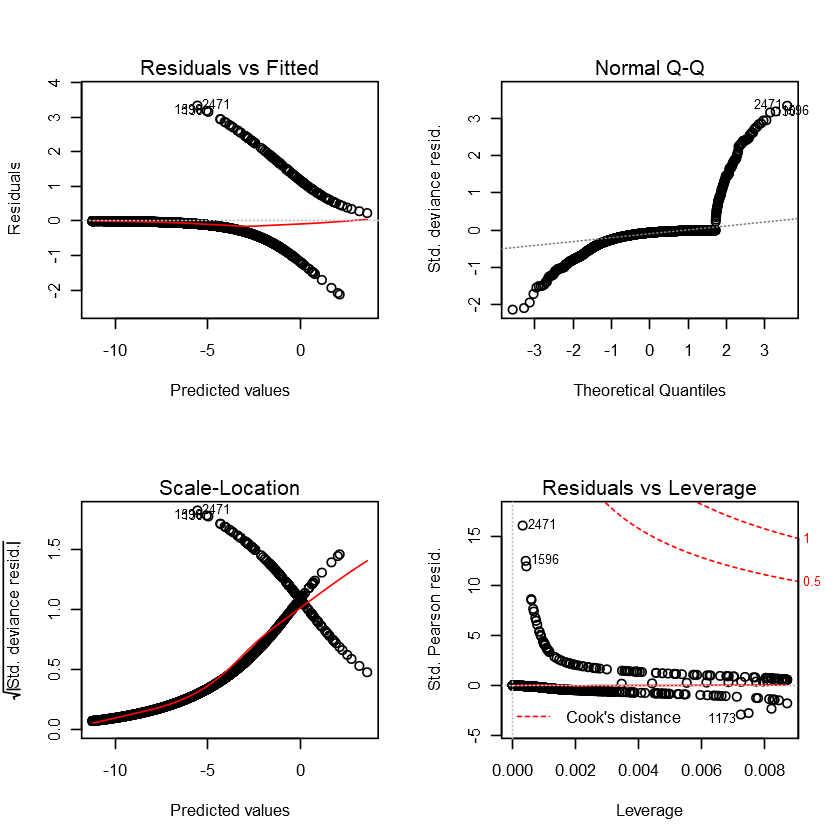

In [131]:
par(mfrow=c(2,2))
plot(St_lReg)

In [132]:
# non-Students (Balance and Default)

nSt_Balance=(Default %>% filter(Student == "No"))$Balance
nSt_Default=(Default %>% filter(Student == "No"))$Default

# Model
nSt_lReg=glm(nSt_Default ~ nSt_Balance, family = binomial)
summary(nSt_lReg)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-10.874681794,0.4639679171,-23.43843,1.734470e-121
nSt_Balance,0.005818816,0.0002936985,19.81221,2.336069e-87


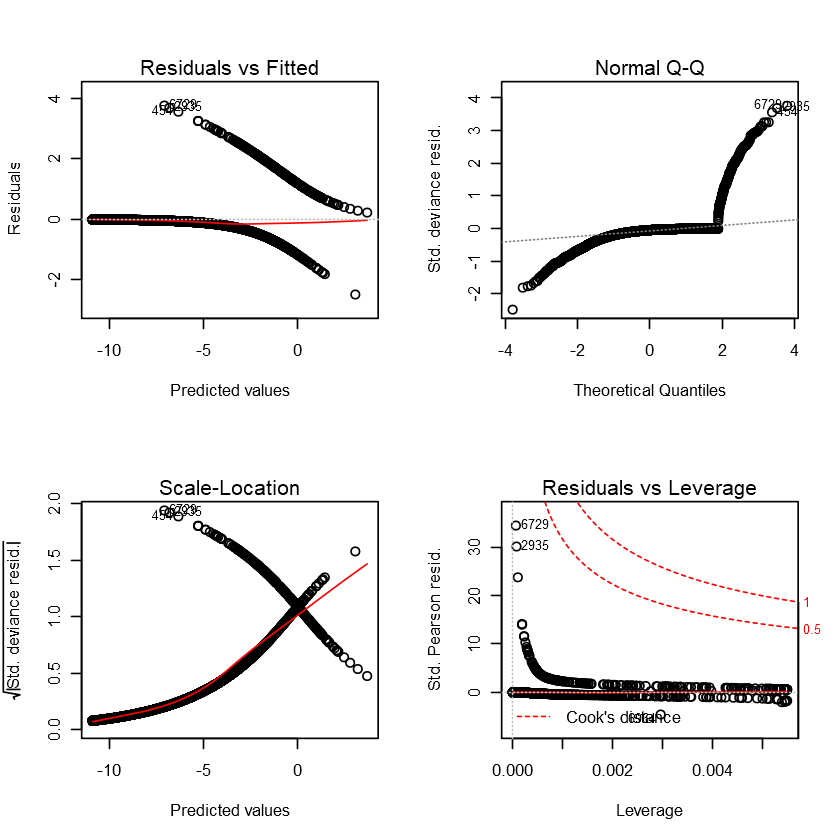

In [133]:
par(mfrow=c(2,2))
plot(nSt_lReg)

Now the plots

In [141]:
# x-axis for ploting
X=floor(min(Default$Balance)):(floor(max(Default$Balance))+1)
Prop_st=predict(St_lReg,data.frame("St_Balance" = X))
nProp_st=predict(nSt_lReg,data.frame("nSt_Balance" = X))
par(mfrow=c(1,2))
y1=exp(Prop_st)/(1+exp(Prop_st))
y2=exp(nProp_st)/(1+exp(nProp_st))

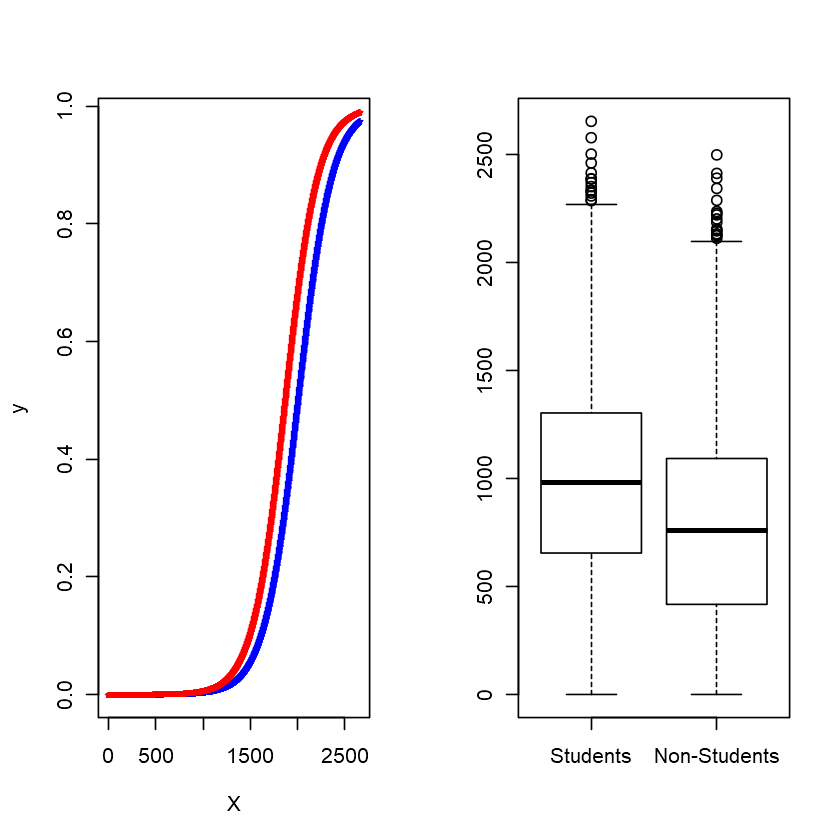

In [142]:
par(mfrow=c(1,2))
plot(X, y1, col="blue", pch="*", lty=0.5, ylab="y" )
points(X, y2, col="red", pch="*")
lines(X, y2, col="red",lty=0.5)
legend(1,10,legend=c("Students","Non-Students"), col=c("red","blue"),lty=c(1,2), ncol=1)

boxplot(St_Balance, nSt_Balance, names=c("Students","Non-Students"))

The corrolation matrix:

In [136]:
Cor_Mat=cor(df)
Cor_Mat

,Default,Student,Balance,Income
Default,1.00000000,0.03542047,0.3501192,-0.01987145
Student,0.03542047,1.00000000,0.2035777,-0.75398534
Balance,0.35011925,0.20357774,1.0000000,-0.15224340
Income,-0.01987145,-0.75398534,-0.1522434,1.00000000


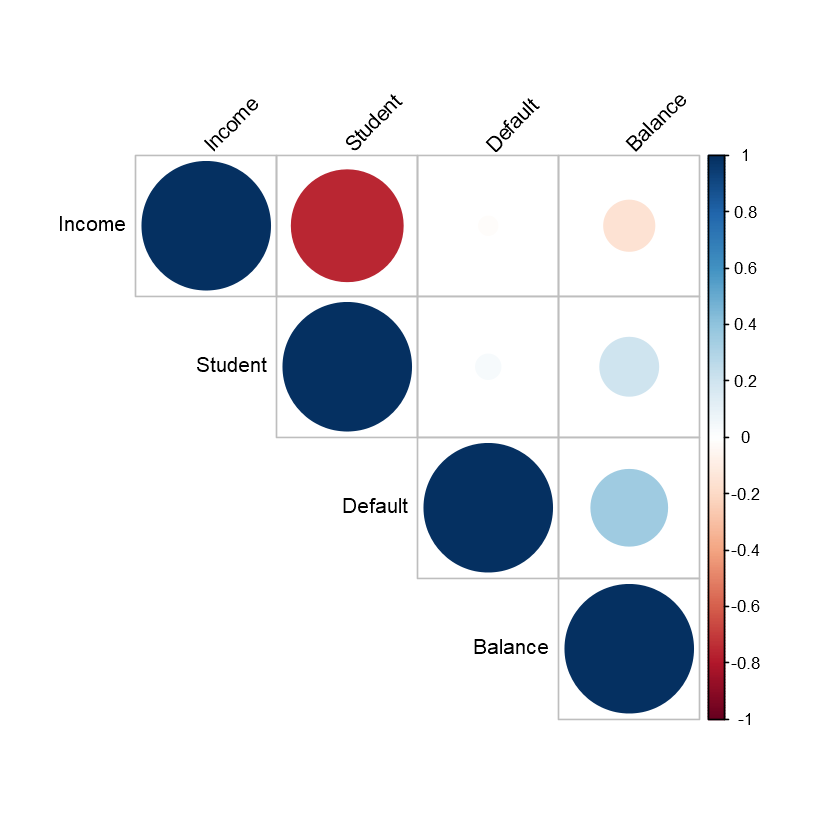

In [137]:
corrplot(Cor_Mat, type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)

As can be seen, the variables **Student** and **balance** are correlated and Students have higher values of depts, and the probability of default is higher for students.